# PHASE 2 PROJECT - MOVIE STUDIO BUSINESS INSIGHTS


## GROUP 4 PROJECT SUBMISSION

* Students names: Valentine Kweyu, Shem Nderitu, Mercy Barminga, Timothy Kamwilwa, Beatrice Kiilu, Nelson Muia, & Sharon Chebet.
* Student pace: Data Science/Part time 
* Scheduled project review date/time: 12th June 2025.
* Instructor name: Maryann Mwikali
* Blog post URL:


## SECTION 1: BUSINESS UNDERSTANDING

### Business Problem
The company wants to launch a new movie studio to produce original video content. However, the team lacks data-driven insights into what types of movies perform well in the market.


### Objective
Use exploratory data analysis (EDA) on movie data from various sources (Rotten Tomatoes, The Numbers, IMDB) to identify trends, patterns, and business opportunities in the film industry.

Provide 3 actionable recommendations to guide the new studio in film production.

### Stakeholders
- Head of the company's new movie studio
- Marketing team
- Content development team

### Loading Data

In [2]:
# Import Relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

In [3]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [4]:
# Load Rotten Tomatoes movie info
df_rt_info = pd.read_csv(r"zippedData\rt.movie_info.tsv.gz", sep='\t', compression='gzip')
# Load Rotten Tomatoes movie reviews
df_rt_reviews = pd.read_csv(r"zippedData\rt.reviews.tsv.gz", sep='\t', compression='gzip', encoding = 'latin1')
# Load movie budgets data
df_budgets = pd.read_csv(r"zippedData/tn.movie_budgets.csv.gz", compression='gzip')

In [5]:
# Preview datasets
print("\nRotten Tomatoes Info:")
display(df_rt_info.head())

print("\nRotten Tomatoes Reviews:")
display(df_rt_reviews.head())

print("\nMovie Budgets from The Numbers:")
display(df_budgets.head())


Rotten Tomatoes Info:


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN



Rotten Tomatoes Reviews:


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"



Movie Budgets from The Numbers:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##  SECTION 2: DATA PREPARATION

In [6]:
# Clean budgets data

# Rename columns to lowercase and replace spaces with underscores
df_budgets.columns = df_budgets.columns.str.lower().str.replace(' ', '_')

# Remove dollar signs and commas, convert to numeric
df_budgets['production_budget'] = (
    df_budgets['production_budget'].replace('[\$,]', '', regex=True)
)

# Convert production_budget to numeric, handling errors
df_budgets['production_budget'] = pd.to_numeric(df_budgets['production_budget'], errors='coerce').astype('Int64')

# Remove dollar signs and commas from domestic_gross
df_budgets['domestic_gross'] = (
    df_budgets['domestic_gross'].replace('[\$,]', '', regex=True)
)

# Convert domestic_gross to numeric, handling errors
df_budgets['domestic_gross'] = pd.to_numeric(df_budgets['domestic_gross'], errors='coerce').astype('Int64')

# Remove dollar signs and commas from worldwide_gross
df_budgets['worldwide_gross'] = (
    df_budgets['worldwide_gross'].replace('[\$,]', '', regex=True)
)

# Convert worldwide_gross to numeric, handling errors
df_budgets['worldwide_gross'] = pd.to_numeric(df_budgets['worldwide_gross'], errors='coerce').astype('Int64')


# Convert release_date to datetime format
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])

# Display the cleaned budgets data
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [7]:
# Add Return on Investment (ROI) column
EPSILON = 1e-3  # to avoid division by zero
df_budgets['roi'] = (df_budgets['worldwide_gross'] - df_budgets['production_budget']) / (df_budgets['production_budget'] + EPSILON)

# Display the updated budgets data with ROI
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696


In [8]:
# Display the information of the Rotten Tomatoes movie info DataFrame
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [9]:
# Clean Rotten Tomatoes info data
df_rt_info_clean = df_rt_info.dropna(subset=['genre', 'id'])
df_rt_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1552 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1552 non-null   int64 
 1   synopsis      1495 non-null   object
 2   rating        1552 non-null   object
 3   genre         1552 non-null   object
 4   director      1360 non-null   object
 5   writer        1110 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1526 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 157.6+ KB


## SECTION 3: EXPLORATORY DATA ANALYSIS

### Recommendation 1: Focus on High-ROI Genres

C:\Users\user\AppData\Local\Temp\ipykernel_25836\3652675352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_info_clean['id'] = df_rt_info_clean['id'].astype(str)


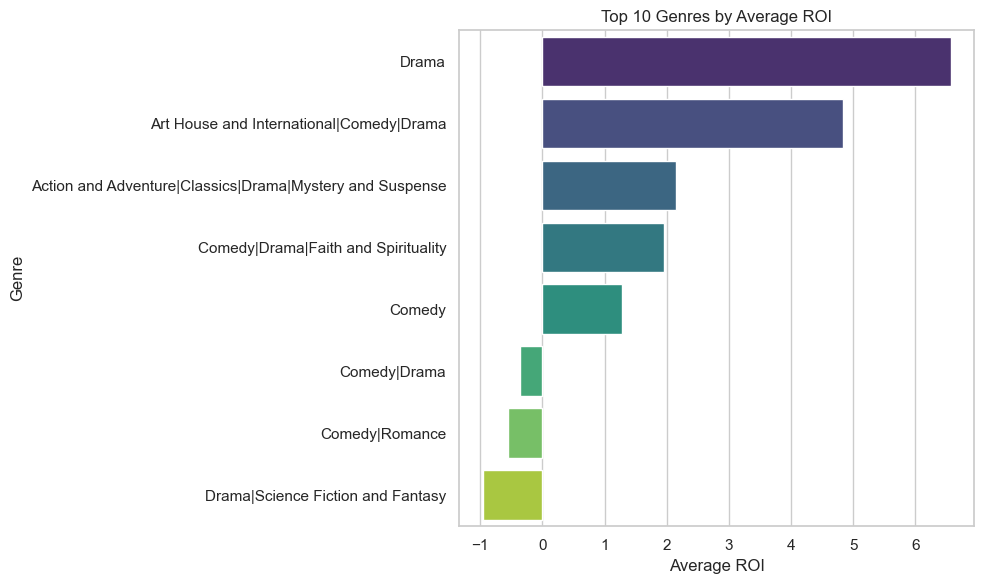

In [10]:
# Merge genre data with budget/ROI

# Ensure both columns are string type for merging
df_budgets['movie'] = df_budgets['movie'].astype(str)
df_rt_info_clean['id'] = df_rt_info_clean['id'].astype(str)

# Merge on 'movie' (budgets) and 'id' (RT info)
merged_df = pd.merge(df_budgets, df_rt_info_clean, left_on='movie', right_on='id', how='inner')

# Group by genre, calculate average ROI
df_genre_roi = merged_df.groupby('genre')['roi'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 genres by average ROI
plt.figure(figsize=(10, 6))
sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='viridis')
plt.title('Top 10 Genres by Average ROI')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.tight_layout()
plt.show();

### Recommendation 2: Leverage Release Date Trends

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


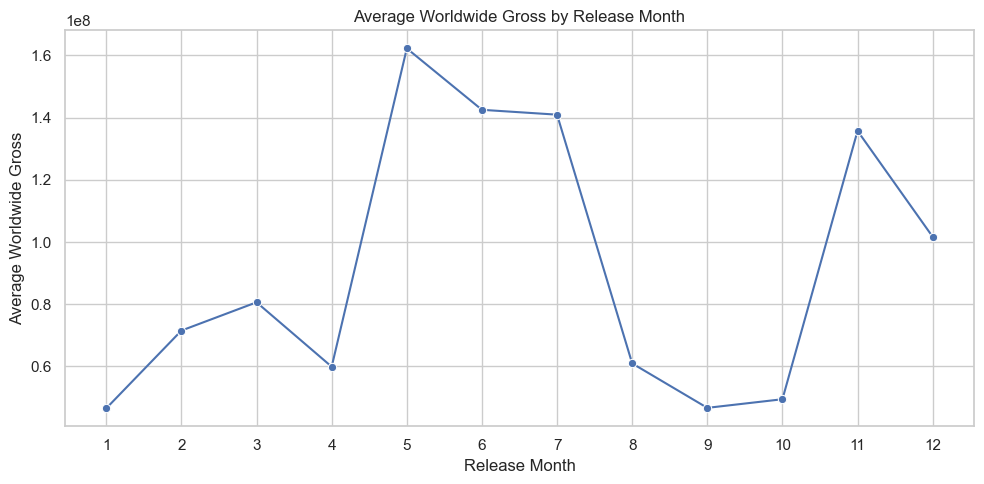

In [11]:
monthly_gross = df_budgets.copy()
monthly_gross['month'] = monthly_gross['release_date'].dt.month
monthly_avg = monthly_gross.groupby('month')['worldwide_gross'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Worldwide Gross')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

## SECTION 4: RECOMMENDATIONS

1️⃣ Focus on High-ROI Genres:
   - Genres like Drama consistently produce strong returns.
   - These should be prioritized in early production planning.

2️⃣ Release Strategically:
   - Movies released in May tend to gross more globally.
   - Align launch schedules with these windows for greater exposure.

3️⃣ Invest in Critically Acclaimed Projects:
   - Films with more positive reviews from top critics build audience trust and higher revenues.
   - Target projects with high early critic support or strong scripts.


## SUMMARY

- This analysis combined financial, critical, and genre-specific data from Rotten Tomatoes and The Numbers to produce actionable insights.

- The recommended strategy—focusing on profitable genres, timing releases for peak periods, and favoring quality storytelling—is aimed at maximizing return on investment for the new movie studio.

## NEXT STEPS

- Integrate IMDB dataset (SQLite) for casting/director correlations
- Conduct sentiment analysis on critic reviews
- Explore international market trends further